# Canadian data

## Import data and librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme(style='white')
energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = energy_table[energy_table.Code=='CAN']
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')

gdp_table = gdp_table[gdp_table.Code=='CAN']
gdp_table.drop('Entity', axis=1, inplace=True)
gdp_table.drop('Code', axis=1, inplace=True)
gdp_table.drop('145446-annotations', axis=1, inplace=True)
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='CAN']
CAN_table = pd.merge(gdp_table, pop_table, on=['Year'])
CAN_table = pd.merge(CAN_table, energy_table, on=['Year'])
CAN_table.head()

,Year,GDP per capita,Entity_x,Code_x,"Total population (Gapminder, HYDE & UN)",Entity_y,Code_y,Primary energy consumption (TWh)
0,1820,1441.0,Canada,CAN,879432,Canada,CAN,46.680726
1,1830,1594.0,Canada,CAN,1202146,Canada,CAN,60.018399
2,1840,1852.0,Canada,CAN,1745604,Canada,CAN,73.703190
3,1850,2120.0,Canada,CAN,2487811,Canada,CAN,84.404627
4,1860,2313.0,Canada,CAN,3231338,Canada,CAN,143.087358


## Explore data

### Energy

In [2]:
pop = CAN_table['Total population (Gapminder, HYDE & UN)']
gdp = CAN_table['GDP per capita']*pop
energy = CAN_table['Primary energy consumption (TWh)']*3.6
year = CAN_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)

No handles with labels found to put in legend.


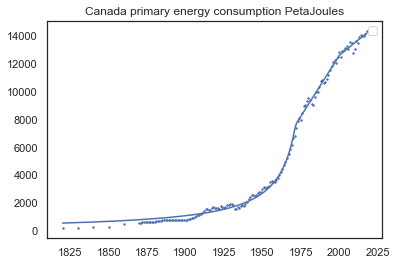

In [3]:
plt.scatter(year, energy, s=2) 
b,c,d,f,x1,x2 = 80000, 1985, 150, 85, 1973, 2003
b,c,d,f,x1,x2  = reg.hypLinLin(year, energy, p0=(b,c,d,f,x1,x2 ))
plt.plot(yplot, reg.hyp_lin_lin(yplot, b,c,d,f,x1,x2))

plt.title("Canada primary energy consumption PetaJoules")
plt.legend()
ypred=reg.hyp_lin_lin(year, b,c,d,f,x1,x2)
CAN_table['Energy(PJ)-Time(Year)'] =ypred

### GDP

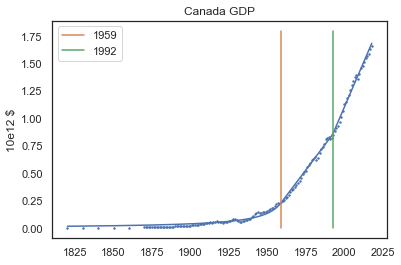

In [4]:
plt.scatter(year, gdp/10**12, s=2)
plt.title('Canada GDP')
b,c,d,f,x1,x2 = 12, 1983,0.033,0.025,1971,2009
b,c,d,f,x1,x2 = reg.hypLinLin (year, gdp/10**12, p0=(b,c,d,f,x1,x2), bounds = [-2, 2100])
plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 1.8], label=str(int(x1)))
plt.plot([x2, x2], [0, 1.8], label=str(int(x2)))
plt.legend()
plt.ylabel('10e12 $')
ypred= (10**12)*reg.hyp_lin_lin(year,b,c,d,f,x1,x2 )
CAN_table['GDP(2011$)-Time(year)']=ypred


### Correlation energy GDP

(0.113670424125, 0.022468843656, 9.999725341796875, 0.02545285786896327, 0.020199696567755023, -0.013045770648712485)
No handles with labels found to put in legend.


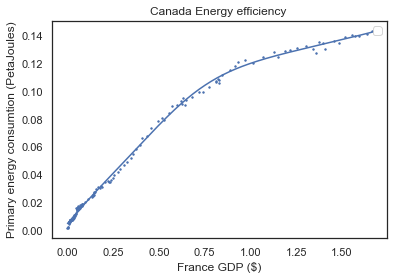

In [5]:
g= gdp/10**12
e = energy/10**5
gplot = np.linspace(g.min(), g.max(), 200)
plt.scatter(g,e, s= 2)
plt.xlabel('France GDP ($)')
plt.ylabel('Primary energy consumtion (PetaJoules)')
plt.title('Canada Energy efficiency ')
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e, bounds= [-20,20], maxfev=1800000)
plt.plot(gplot, reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ))
inf_dist = np.array([abs(g[i]-0.3) for i in range(len(g))])
year_infl = year[inf_dist.argmin()]
e_max = reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ).argmax()
max_dist = np.array([abs(g[i]-gplot[e_max]) for i in range(len(g))])
year_max = year[max_dist.argmin()]
 
plt.legend()
ypred = (10**5)*reg.s_model(g,G_i, E_i, A, a1, a2, a3 )
CAN_table['Energy(PJ)-GDP(10e12$)'] = ypred

No handles with labels found to put in legend.


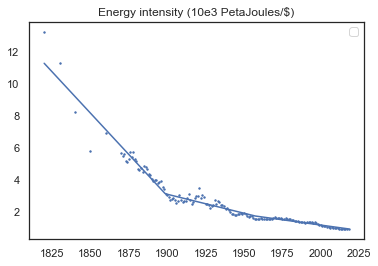

In [6]:
plt.scatter(year, energy/gdp*10**8, s=2)
a,b, c, e, g, x1, x2, x3 = -10, 10, 10, -2*10, -1.5*10, 1850, 1925, 1980
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, energy/gdp*10**8, p0=(a,b, c, e, g, x1, x2, x3) , bounds = [-200,2010])
plt.plot(yplot, reg.llll(yplot,a,b, c, e, g, x1, x2, x3 ))
plt.legend()
plt.title('Energy intensity (10e3 PetaJoules/$)')
ypred = (10**8)*reg.llll(year,a,b, c, e, g, x1, x2, x3 )
CAN_table['EI(PJ/$)-Time(year)'] = ypred

Text(0.5, 1.0, 'Variation in (%), Canada')

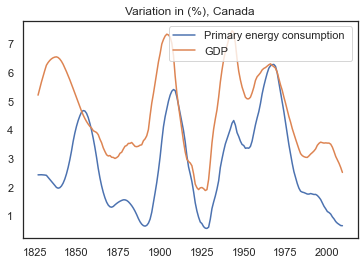

In [7]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), Canada")


## Save table to CSV

In [8]:
CAN_table = CAN_table.rename(columns={'Code_x':'Code','Entity_x':'Entity', 'Energy (PetaJoules)':'Primary energy (PJ)', 'Primary energy consumption (TWh)':'Primary energy (TWh)','Total population (Gapminder, HYDE & UN)' : 'Population' })
CAN_table['Primary energy (PJ)']=energy
# CAN_table.to_csv('../BDD/CAN.csv', index=False)

In [9]:
CAN_table.head()

,Year,GDP per capita,Entity,Code,Population,Entity_y,Code_y,Primary energy (TWh),Energy(PJ)-Time(Year),GDP(2011$)-Time(year),Energy(PJ)-GDP(10e12$),EI(PJ/$)-Time(year),Primary energy (PJ)
0,1820,1441.0,Canada,CAN,879432,Canada,CAN,46.680726,550.708301,1.972019e+10,516.769416,1.128371e+09,168.050615
1,1830,1594.0,Canada,CAN,1202146,Canada,CAN,60.018399,586.602391,2.111064e+10,526.979825,1.024468e+09,216.066236
2,1840,1852.0,Canada,CAN,1745604,Canada,CAN,73.703190,627.501725,2.271203e+10,547.674850,9.205653e+08,265.331484
3,1850,2120.0,Canada,CAN,2487811,Canada,CAN,84.404627,674.531704,2.457632e+10,579.706686,8.166624e+08,303.856656
4,1860,2313.0,Canada,CAN,3231338,Canada,CAN,143.087358,729.182446,2.677404e+10,614.155414,7.127595e+08,515.114490
